![](Images/prezzz_paul.png)  

----------

# PRESENTATION

## Sujet du stage

__L'objectif initial du stage est d'analyser des données de Scal'Air NC, obtenue grâce à une API développée qui vient scrapper le site web de Scal'Air. Le but du stage étant de produire un "data story telling" ainsi qu'un modèle de prédiction pouvant possiblement être exporté sur une API. Ce schéma de travail pourrait quant à lui servir de base pour toutes autre approches d'analyses de données sur de l'open Data lors d'innovation à l'OPT.__
  
[-Lien Sujet du stage](https://sway.office.com/pQ4PEOhog4vQOe2l?ref=email)  

[-Lien Présentation reveal.js](https://slides.com/monimpaul/deck-4c5e0d/fullscreen)  

[-Lien Rapport sur Git](https://github.com/Icet0/Rapport/blob/master/Rapport.ipynb)

## Apprentissage avec OpenClassRooms et autres

[Toute cette partie est en annexe](#Apprentissage-avec-OpenClassRooms)

## Première analyses des données de Scal'Air 

Ces données contiennent l'indice de qualité de l'air pour certains quartier de Nouméa et à des dates données. Cet indice est calculé au préalable par Scal'Air en fonction de la quantité des différentes molécules qui composent l'air. Cet indice est appelé [indice ATMO](https://www.futura-sciences.com/planete/questions-reponses/pollution-quest-ce-indice-atmo-4099/)
  
### Comment l'indice Atmo est-il calculé ?

*Les concentrations maximales horaires d'ozone, de dioxyde de soufre et de dioxyde d'azote, ainsi que les concentrations maximales journalières de particules fines, sont mesurées durant 24 heures. La moyenne de ces concentrations permet ensuite de déterminer les sous-indices des quatre polluants. À chaque sous-indice de polluant correspond une valeur d'indice Atmo. L'indice Atmo retenu est celui correspondant au plus élevé des quatre sous-indices de polluant atmosphérique. Il est possible de faire des prévisions concernant la qualité de l'air du lendemain.*  


### Première observations 

__Un exemple du jeu de données :__   
On voit ici un DataFrame crée par python.


![](Images/tab1.png)

__Les premiers graphiques :__   



Ces premiers graphiques, que l'on peut retrouver en [annexe](#Graphiques,-Premières-analyses), nous montre une visualisation de l'indice ATMO par date. On peut y voir une légère augmentation de ce dernier pour 2 des quartes quartier pour une date précise. Rien qu'avec cela on peut émettre hypothèse, notamment sur l'alignement de certains quartier ainsi que l'influence du vent sur l'indice ATMO de ces quartiers. 

### Modification et ajout de données
#### Suppression de la ligne ***Générale***
![](Images/Quartier.png)

#### Day of The Week

En rajoutant les jours de la semaine, cela nous permet par la suite de classer les indices en fonctions des jours et peut-être trouver une corrélation entre ces derniers et l'indice de pollution. Par exemple, avec plus de données il se pourrait qu'on trouve un indice plus élevée le mardi si la SLN nettoie ses cheminées ( ceci est seulement un exemple imagé ).

__Différente perception de la donnée :__

![](Images/DayOfTheWeek.png)

#### Vent & Température 
Ces données seront pour le moment rajouter sur le .xlsx à la main, nous verrons plus loin comment automatisé cette rentrée de donnée via une API

![](Images/10.png)

__Malgré la faible quantité de données que nous possédons pour le moment, la matrice de corrélation montre quand même une certaine corrélation entre nos attributs__ 


![](Images/corr.png)

__Et grâce à ce schéma la on peut distingué un léger changement de la qualité de l'air en fonction de la force du vent__    
On peut donc supposer que la ou la droite est croissante, les quartiers sont alignés par rapport à la direction moyenne du vent ou très proche.  
__On peut aussi l’observer clairement grâce au heatmap suivant__

![](Images/6.png)

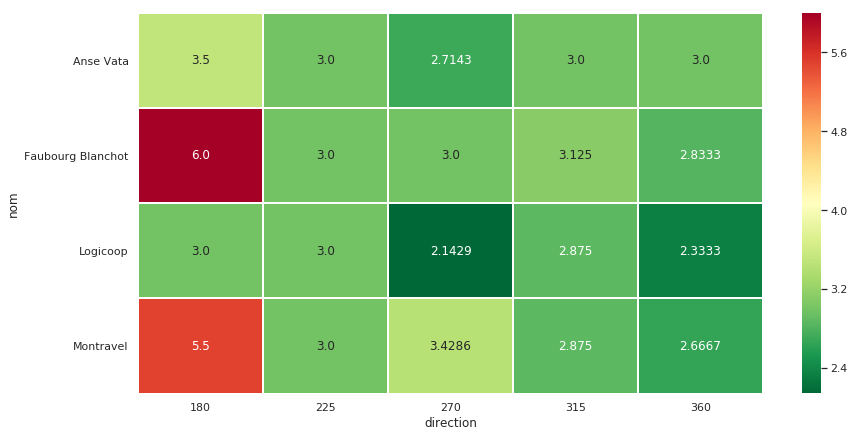

In [3]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

sns.set()
dataScal2_df = pd.read_csv('ScalairNum.csv')
dataScal2_df_Pivot = dataScal2_df.pivot_table('indice', index='nom', columns='direction')
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(dataScal2_df_Pivot, annot=True, fmt=".5", linewidths=.5, linecolor='white', cbar=True, cmap="RdYlGn_r")
# To display the heatmap 
import matplotlib.pyplot as plt
plt.show()

### Des informations plus précises

__Le graphique 3D, de la librairie Plotly, permet une meilleurs compréhension de ces données et surtout, il permet d'observer le lien entre plus de données à la fois.__   
[lien de l'annexe](#Graphique-3D-avec-Plotly)


## Premier model de prédiction avec Orange

Orange est un logiciel fournit avec la suite Anaconda3 qui permet de créer facilement des modèles de prédiction et de visualiser des données. C'est un logiciel utilisable par quiconque ne sachant pas coder.

![](Images/Capture10.png)

### Model Tree

Premièrement avant d'attaquer quoi que ce soit, il faut être bien sur de savoir faire la différence entre modèle de régression et modèle de classification.
Tout d'abord un modèle statistique est un algorithme qui va pouvoir prendre en entrée un jeu de donnée avec une cible ( qui est une variable du jeu de donnée ) et qui va pouvoir s’entraîner sur d'autre donnée afin de pouvoir à l'avenir prédire ou classifier le plus précisément possible cette cible avec des paramètres donnés.

Les problèmes de classement consistent à prédire les classes ou étiquettes d'un ensemble de données à partir d'une base d'apprentissage pré-étiquetée.

Pour la régression, il n'y a pas d'ambiguïté : il s'agit de prédire des valeurs numériques continues pour un ensemble de données à partir d'une base d'apprentissage.

Le modèle Tree est un modèle de classification, l’objectif de notre arbre de décision est donc de classer les couleurs en 3 classes en fonction de leur indice ATMO. A chaque étape, l’algorithme va chercher le critère permettant de séparer au mieux ces 2 populations. Il existe plusieurs critères de séparation, ici la force du vent ainsi que se direction. Dans notre exemple nous allons utiliser l’entropie.

On aurait pu ici prendre un modèle de régression ( comme la régression logistique qui est assez précise dans notre cas ) mais, grâce à orange, nous avons pu comparer la précision entre les différents modèles et le modèle "Tree" est dans les plus précis, mais surtout il est le plus représentatif, notamment avec la possibilité d'affiché un arbre de prédiction.
 
![](Images/Capture9.png)


#### Schéma Model Tree

Nous avons donc choisi de baser notre modèle sur la cible "color" qui départage donc les indices en 3 catégories : green, yellow and red. Après avoir tester avec les indices seul, nous nous sommes rendu compte que la précision était bien plus élevée avec un choix de possibilité plus restreint.

![](Images/Capture8.png)

![](Images/Capture7.png)

### Model Logistic Regression

Ce modèle est à peine plus précis que celui de "Tree" et ça représentation graphique sur Orange est différente. Elle permet de choisir une "target class" donc soit GREEN, YELLOW ou RED et de faire varier nos paramètres pour observer le pourcentage de chance qu'on à d'avoir cette couleur.
Par exemple on peut savoir la probabilité d'avoir un indice dit "RED" sachant qu'on a un vent d'une forceMax supérieur à 11noeuds, une direction entre Sud SudEst et ceux pour le quartier de Montravel :

![](Images/Capture6.png)

Il est notable, que ce soit pour les modèles Orange ou directement crée en python avec Scikit-Learn, que les modèles peuvent être enregistrer en un fichier particulier et ré-ouvert par la suite dans un nouveau programme, ce que nous verrons dans une autre partie.

## Recuperation de la donnée à l'aide d'une API REST

Comme énoncé dans le sujet du stage, la donnée de Scal'Air est accessible via une [API REST](https://www.comprendre-internet.com/Qu-est-ce-qu-une-API-REST-ou-RESTful.html) sur [Rapide API](https://rapidapi.com/adriens/api/scalair-nc).
Il nous a donc suffit d'utiliser une requête http en pyton pour récupérer la donnée chaque jours. Au début du stage, nous disposions de seulement 2 mois de données, que nous avons donc remplit petit à petit grâce à cette API.
Grâce à cette requête HTTP, nous récupérons donc de la donnée sous forme de JSON, il nous à donc fallut la traiter et l'enrichir.
Pour l'enrichir, nous avons donc utilisé une API (rest) d'Open Weather Map disponible aussi sur [RapidAPI](https://rapidapi.com/community/api/open-weather-map).

Avec cet ensemble de donnée récupéré, il nous restait donc juste à assembler le tout et traiter un peu les formats de ces données. Rien de plus simple à faire que ça si l'on est équipé des librairies python : pandas et numpy.

![](Images/HTTPREQUEST.png)

![](Images/Normalis.png)

![](Images/Capture5.png)

## Suite de l'Analyse des données de Scal'Air

Avec ces données supplémentaire nous avons pu observer de nouvelles informations et valider ou non des hypothèses faîtes précédemment.
On observe à l'aide de nombreux schéma seaborn ou matplotlib que la direction du vent et corrélé avec sa force

![](Images/RegVentDirec.png)

De plus on voit aussi que l'indice ATMO est corrélé avec la direction, ce qui semple tout à fait logique compte tenu de la géolocalisation des cartiers étudiés.

![](Images/secondDirectionAnalyse.png)


Par exemple nous pouvons émettre l'hypothèse que lorsque le vent vient du NE ou du N, le vent est souvent très faible, ce qui, si l'on part du principe que le principale pollueur de l'air sur Nouméa est la SLN, semble très plausible. Le vent ne portant pas les particules au loin, celles ci resteraient donc aux alentours de la SLN et donc de Montravel.
Pour ce qui est de l'augmentation de l'indice ATMO pour les quartier Faubourg Blanchot et Montravel lors des vents venant d'Ouest et du SudOuest, ces derniers étant généralement assez élevés, il se pourrait que la pollution venue de la SLN soit répendu sur Montravel ainsi qu'au Faubourg Blanchot.
Après toutes ces spéculations ne sont qu'hypothèse, en effet, notre jeu de données et encore très mince, ce qui ne nous permet en aucun cas d'avancer des certitudes.
Nous avions aussi, lorsque nous avions que les deux premiers mois de données, avancé l'hypothèse qu'il pouvait se passer des activités particulière à la SLN suivant les jours. Et notre premier schéma nous l'exposé bien, en effet l'indice ATMO était plus élevé en moyenne le vendredi. Mais grâce aux nouvelles données rentrée via l'API, le nouveau schéma désapprouve cette hypothèse.

### Toujours plus de données

Grace à certaines connaissance, nous avons pu récupérer les données de Scal'Air depuis 2008, ce qui à pu nous permettre de refaire tous nos graphes d'observation avec cette nouvelle donnée pour pouvoir valider ou non nos hypothèses. Ce que nous pouvons en déduire c'est que ces données sont très aléatoire et ne sont pas vraiment corrélé avec le vent et sa direction. Ceci pourrait aussi s'expliquer par notre moyen de récupération des données météorologiques. En effet la seule API trouvé qui permettait d’obtenir l'historique météorologique depuis 2008 nous donnait seulement la moyenne de la direction et de la force du vent par jour.
Mais sans se pencher sur cette erreur possible, nos nouveaux graphes nous démontre que non seulement notre hypothèse du jour de la semaine plus pollué que les autres est faux et surtout que ce n'est pas seulement la SLN qui pollue.




![](Images/Capture4.png)


En effet ce graphe nous montre bien que lorsque le vent est Sud / SudEst la pollution est plus élevée à Montravel certes, mais aussi sur l'Anse Vata, qui est pourtant dans la direction opposé à la SLN. Ce que nous pouvons en déduire c'est que, lors de vent Sud / SudEst, où le vent est souvent plus fort, la pollution pourrait venir d’ailleurs, comme d'Australie ou de Nouvelle Zélande.

## Création d'une API REST

Le principe de base de cette API est donc, suivant des paramètres passé lors de la requête HTTP (force du vent / direction du vent / lieu), de nous retourner une prédiction de l'indice ATMO.
En testant la création d'un modèle sur orange et de son exportation, nous n'avons pas réussi à réutiliser se modèle en python, alors nous nous somme pencher sur la question. Et nous avons décider de créer notre propre model en python à l'aide de Scikit-Learn. Malgré la quantité de données récoltées assez importante, notre modèle de prédiction, qu'il soit de classification ou de régression, n'était pas du tout précis (Précision = 0,6). Mais nous l'avons quand même utilisé pour travailler sur le principe, qui sera reproductible avec un modèle plus précis si un jours nous en avons un, ou sur un jeu de donnée différent. Malgré tout, nous arrivons quand même à générer un modèle d'une précision de 0,86 mais sur une cible qui est la "color". Le problème étant que pour la démo, ce modèle ne retourne que "GREEN".



![](Images/Capture3.png)

![](Images/Capture2.png)

Pour en revenir a la création de notre API REST, nous avons simplement dans un code python importé un modèle déjà créé et entraîné auparavant. 



![](Images/savModelJup.png)


Au final, il s'agit d'un script python qui utilise la librairie Flask, qui permet simplement d'assigner une réponse à une requête http. En plus de ça il nous à suffit de créer une classe ayant pour attribut nos paramètres du modèle (wind / place / direction) et important le modèle.


![](Images/classPrev.png)

![](Images/returnJson.png)


Et retournant sa réponse en Json.


Une fois ce Script Python lancé, il nous suffit d'ouvrir sur un navigateur le lien local host sur le port 5000 ainsi que les compléments d'URL et les paramètres pour obtenir une prédiction et le Json renvoyé par le programme. Mais le but ne s’arrête pas la, ce que nous voulons c'est que cette API tourne h24 et que quiconque puisse y avoir accès et par n'importe quel moyen. Pour cela, nous avons du déployer cette API dans le cloud via heroku, puis sur un market place grâce à Rapide Api. Et nous avons aussi tester de récupérer les données en Java.

### Heroku & RapidAPI

Heroku est donc une plateforme en ligne permettant d'héberger gratuitement des petites API. Pour publier la notre, à l'aide du CLI fournit par heroku sous linux, il nous à juste suffit de Dockeriser notre environnement et de créer un fichier requirement.txt qui indique toutes les dépendances de notre script python.
Une fois nos fichiers envoyé sur heroku, et après maintes phases de test, notre api était disponible via une URL publique. Le travail restant était juste de publier ce lien sur Rapide Api et de documenter un peu notre API en y montrant des exemples.
Finalement, grâce à un programme java, nous arrivons à récupérer notre prédiction et cela de n'importe où. De plus Rapide Api propose des exemples de code pour l'utilisation de l'api.




Code Java :


![](Images/Capture1.png)


Réponse du Java :


![](Images/resJavaRequestApi.png)

## Un tout nouvel horizon et de nouvelles données

Après cet entraînement sur les données de Scal'Air et un processus bien rodé, nous pouvons maintenant s'attaquer à un exemple possiblement utile à l'OPT, le temps d'attente dans les Agences OPT
Cette donnée est récupérer grâce à un script python qui via un cron tourne toutes les 5min et va récupérer les données grâce à une API disponible sur le site de l'OPT.
Après un petit tris et un gros nettoyage, les données sont stockées sur un csv qui ne cesse de grossir.

### L'utilité possible

Ce que l'on peut espérer de ces analyses, c'est qu'on puisse observer une régularité du temps d'attente en fonction des horaires, et du nombre de guichet ouvert, et de l'agence. Ces informations pourrait être utiles pour une réorganisation des Agences, ou bien même pour le client qui voudrait prédire, ou avoir une idée du temps à attendre pour aller déposer ou récupérer son colis/courrier/etc...

### Récupération de la donnée

Pour récupérer cette donnée sur les temps d'attentes, il nous a fallut récupérer l'endpoint d'une API sur le site de l'opt, qui permet d'afficher en direct le temps d'attente dans les agences. Une fois cet endpoint connu, il nous a juste fallut l'exploiter en python, en faissant une requête http sur cet endpoint. Puis nous avons du nettoyer le résultat pour qu'il ne nous reste plus que ce que l'on voulait. [Code en annexe](#Récupération-de-la-donnée-du-temps-d'attente)   
Autrement dit : 




![](Images/20.png)


Ce script python est alors lancé, grâce à un crontab, toutes les 5 minutes. Ce qui nous procure pas mal de données.

### Analyse de la donnée
#### Netoyage

Une fois notre csv prêt à l'emploi, nous avons commencé à retravailler cette donnée en python et à afficher les premiers graphiques, le principe de nettoyage et d'amélioration de la donnée est identique aux méthodes utilisaient pour le jeu de donnée Scal'Air.
A une chose près, dans ces données la, nous avons remarqué une anomalie qui revenait assez souvent.
Le problème venait directement de la borde Esirius ou de l'agence elle même.
En effet, de temps en temps, le temps d'attente moyen et maximum ne cessait d'augmenter et atteignait des fois des sommes folles (+7h). Nous avons donc pris la décision de supprimer toues les lignes avec un temps d'attente moyen de plus de 2h ainsi que toutes les lignes précédentes pour la même agence et pour le même jour jusqu'à ce que l'on tombe sur un temps d'attente plus élevé.

![](Images/gimp.png)

#### Représentations graphiques

Notre premier graphique à était un heatmap représentant le nombre de seconde d'attente moyenne pour chaque agences et chaque horaires. 

[heatmap en annexe](#Heatmap-OPT)



Bien entendu toutes ces moyennes sont plutôt bien représentative, mais tout de même à prendre à la légère et observer la médiane ainsi que l'écart type.
Grâce à ce schéma, on observe très clairement quelles sont les agences les plus visitées et sur quels créneaux horaires.
Cela nous permet de voir aussi quelles agences sont ouvertes au publique et celles qui ne le sont pas.
A contrario, la médiane nous montre aussi qu'à certaines horaires, il peut y avoir beaucoup d'attente, comme aucune attente : par exemple MAGENTA A 15H.

Ce schéma suivant nous permet d'observer le temps d'attente moyen en seconde suivant les agences et le jour de la semaine. On y voit un temps d'attente plus long le lundi et mardi pour l'agence de magenta par exemple.


Mis à part ces heatmaps, des graphiques 'camembert' ont étaient utilisés pour visualiser la donnée. Pour chaque agence un graphique, représentant en moyenne le nombre de secondes (en survol, sinon heure:minutes:secondes) d'attente pour chaque horaires.


![](Images/piechartMagenta.png)

### Algorithme de prédiction

Comme vu avec le jeu de donnée précédent, il est préférable, premièrement, de tester le validité des modèles de régression et de classification sur Orange. Comme expliqué précédemment, cette étape a était faite et couplé à l'essai de plusieurs algorithmes sur Python avec Scikit-Learn, le modèle retenu et le 'RandomForestClassifier'.
Avec notre petit jeu de donnée, on arrive à une précision d'environ 0,84.

![](Images/randomForest.png)

Cet algorithme est principalement basé sur celui du 'TreeClassifier' :

![](Images/treeExemple.png)

#### Pourquoi avoir choisi cet algorithme ?

Parce que le modèle 'TreeClassifier' à tendance à sur aprendre et que pour palier à ce problème le modèle RandomForestClassifier a était crée.
Il permet de créer plusieurs arbres avec pour moyen de séparation des éléments aléatoires, et il prend ensuite comme résultat, le plus grand nombre d'étiquette identique retourné.


![](Images/randomForestExemple1.png)

![](Images/randomForestExemple2.png)

Encore une fois ce modèle est exportable et peut être utilisé avec n'importe quel code.
Nous allons encore une fois l'utiliser dans une API faite en python.

### Création de l'API 

Nous reprendrons les même étapes que pour les données de scal'Air, il suffit, grâce à python et la librairie Flask de faire un petit script important le modèle et retournant, suivant les endpoints, le json voulu.
Une fois fait, nous reproduirons encore une fois la même méthode, autrement dis, nous publions l'API sur heroku via le CLI d'heroku et un dokerfile. Et nous ajoutons l'API sur Rapide API ainsi que sa documentation.
Par contre, nous avons mis en place, cette fois ci, un pipeline entre heroku et la repo contenant tous les fichiers pour faire tourner l'API. Ce pipeline permet de ré upload l'API sur heroku si il survient un quelconque changement sur la repo. Ce qui nous permet de mettre continuellement le modèle à jour avec les nouvelles données qui arrivent tous les jours. C'est un déploiement continu.
Finalement, cette fois ci, nous n'essayerons pas d'appeler l'API en Java mais en PHP sur un site web.

### Création d'une interface Web

Une interface web à était crée pour montrer que l'API est utilisable partout.
Ce site web à était créer en PHP/HTML/CSS/JS avec comme framework Bootstrap 4 pour le coté responsive.
Ce site web est donc conçus sur un modèle MVC "from scratch" et est facilement utilisable sur téléphone.

https://optapi2.000webhostapp.com/MDB-Free/index.php  
[**(QR code en Annexe)**](#QR-Code-Site-Web)



### Création d'une application Mobile

Une application Mobile à était crée dans le même principe que le front Web, avec en petit plus l'affichage de ce que l'on a sur le site Web actuel de l'OPT (les temps d'attentes en direct). 
[___(QR code en Annexe)___](#Télécharger-l'app)

Cet application a était développer en Dart et sous le framework google : Flutter.
Ce langage permet de compiler le code sous Android et sous IOS sans aucune modification du code. De plus le framework flutter est très suivit et possède un très grand nombre de widget utilisables.
Ce langage est un langage objet, il ma donc était assez facile de l'apprendre, sachant déjà coder en Java.
Premièrement, l'application comprenait seulement l'affichage 'live' des temps d'attentes.


![](Images/Screenshot_2019-12-09-08-25-30-581_com.example.apirequest.jpg)

![](Images/Screenshot_2019-12-09-08-25-49-157_com.example.apirequest.jpg)



Sur le coté droit on retrouve un code couleur et une icon permettant de voir rapidement si une agence possède beaucoup d'attente ou non.
De plus les agences sont triées dans l'ordre croissant suivant leur temps d'attente moyen.

Une fois que l'on clic sur une agence, on peut avoir quelques informations supplémentaires, comme les heures d'ouvertures et de fermetures, le lien google map de l'adresse et un bouton 'live ticket'. Ce bouton redirige vers une vidéo youtube qui montre un écran avec les numéros des tickets en cours. L'idée serait, dans un futur proche, de soit avoir directement la donnée du ticket en cours dans l'api OpenData de l'opt, ou un flux vidéos continu qui filmerait les écrans des tickets. Avec ça, il serait possible d'aller chercher son ticket à l'agence et de repartir faire une quelconque course en attendant une notification qui nous dirait que c'est bientôt notre tour par exemple. On pourrait même imaginer qu'il serait possible de récupérer un ticket directement sur l'application.

![](Images/Screenshot_2019-12-09-08-26-00-493_com.example.apirequest.jpg)

Cette application contient aussi une partie 'prévision', reprenant le même principe que celui du site Web.
Nous avons 3 'pageView' (3 pages avec une gestion de switch sur les cotés de l'écran pour passer d'une page à l'autre) avec sur chacune un formulaire dédié a la prédiction voulue (Endpoint). Le reste des Screenshots pourra être retrouver en [annexe](#ScreenShots-Application-Mobile).

![](Images/app/Screenshot_2019-12-12-07-58-14-672_com.example.apirequest.jpg)

# ANNEXES

## Apprentissage avec OpenClassRooms
  
[lien partie principale](#Apprentissage-avec-OpenClassRooms-et-autres)

### Technologies utilisés
* Anaconda3
![anaconda3](Images/anaconda.png)
* JupiterNoteBook
![jupyterNoteBook](Images/jupyter.png)



* Python3.7
![python](Images/python.png)
* GitLab
![gitLab](Images/gitLab.png)

* GitKraken
![gitKraken](Images/gitKraken.png)


### Fonctionnement d'OpenClassRooms
* Le cours est structuré et il évolutif, et propose même des évaluations pour se perfectionner et ce tester. Malheureusement, même en ayant validé ses évaluations, le certificat de réussite n'est disponible que si le compte est premium. ![certificat](Images/CertificatReussite.png) 
De plus les cours sont remplis d'exemples :

![](Images/captureOpenCR.png)

* Les évaluations sont validé par des élèves et pour réussir le cours complet et obtenir le certificat (seulement si le compte est premium ) il faut aussi corriger 3 évaluations d'autres élève. C'est un très bon exercice pour apprendre et pour voir différents moyen d'arriver à un même but.

### Sujets abordés
#### Anaconda et Python
Le cours [Learn Python Basics for Data Analysis](https://openclassrooms.com/fr/courses/2304731-learn-python-basics-for-data-analysis/6009031-get-started-with-python-and-anaconda) à servi à se remémorer le fonctionnement de base de Python, et surtout à l'utilisation de Jupyter NoteBook.
Pour obtenir Jupyter NoteBook, il suffit d'installer l'environnement Anaconda3, qui fournit Python 3.7 et l'Anaconda Navigator ( qui contient Jupyter NoteBook et d'autre application ).
Ce cours nous initie donc au Python avant de toucher à de l'analyse de données.


#### Librarie pour la Data Science
Ce cours suivant [Use Python librairies for Data Science](https://openclassrooms.com/fr/courses/1730411-use-python-libraries-for-data-science/5788640-operate-on-numpy-arrays)
à quant à lui servi pour l'apprentissage de la mise en valeur des données. Notamment grâce à de nombreuses librairies qui permettent d'afficher de la données dans des tableaux ou dans toutes sortes de graphiques différents et d'appliquer des traitements sur cette dernière.
Dans l'ordre du cours les librairies utilisées sont :

* Numpy
* Matplotlib
* Seaborn
* Pandas


__Numpy__ est une librairie très utilisé en python, elle est la base de toutes les autres cité ci-dessus. Elle permet de créer des tableaux aux dimensions voulues, d'accéder aux cases voulues mais aussi à appliquer toutes sortes de calculs sur les données de ces derniers.

![](Images/CaptureNp.png)

__Matplotlib__ est une librairie qui sert à générer des graphiques directement depuis python. On peut créer toutes sortes de graphiques statiques, de quoi trouver son bonheur et ce qui explique le mieux possible nos données.
![](Images/Matplotlib.png)


![](Images/Matplotlib2.png)


![](Images/Matplotlib3.png)

Il existe de nombreux types de graphiques possible, ce site référence les 50 "meilleurs" :
[Top50 Matplotlib visualizations](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

#### Plus de grapique avec Plotly et HoloViews
__[Plotly](https://plot.ly/python/) et [HoloView](http://holoviews.org/)__ sont d'autres librairies python servants à visualiser des données, elles viennent compenser Matplotlib, notamment grâce à la possibilité de créer des graphiques et schéma dynamique voir même interactif.

#### Regression linéaire avec Scikit-Learn
__Qu'est-ce que la régréssion linéaire ?__

La régression linéaire est utilisée en statistiques pour déterminer l'influence d'une ou plusieurs données variables sur une évaluation qui se veut linéaire, en prenant en compte des paramètres aléatoires. 
Dans le cadre d'un modèle linéaire simple, on peut représenter graphiquement la relation entre x et y à travers un nuage de points.

 L'estimation du modèle linéaire permet de tracer la droite de régression, d'équation $y = \beta_{0} + \beta_{1}x$. Le paramètre $\beta_{0}$ représente l'ordonnée à l'origine et $\beta_{1}$ le coefficient directeur de la droite. 

![](Images/regL.png)


__Scikit-Learn__ Cette librairie permet de classifier des données, d'appliquer des regroupements, des régressions et pleins d'autre processus statistique (Machine Learning, etc).
```python
# Create linear regression object
regr = linear_model.LinearRegression()
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
```

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [5]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


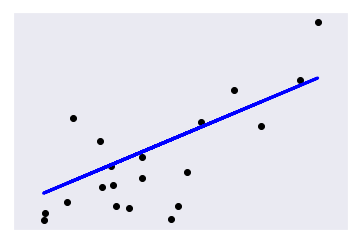

In [6]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

La régression linéaire, peut plus simplement se faire avec seaborn, qui propose des graphiques avec régression intégré. Une méthode un peu plus simple pour une simple régression linéaire.

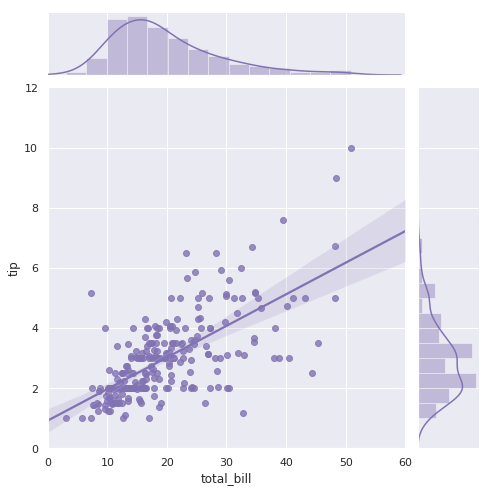

In [7]:
import seaborn as sns
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="m", height=7)

#### Model de régression linéaire
![](Images/modelReg.png)

## Graphiques, Premières analyses

  
[lien de la partie principale](#Première-observations)  

![](Images/1.png)

![](Images/2.png)

## Graphique 3D avec Plotly  

[lien de la partie principale](#Des-informations-plus-précises)  

__Le graphique 3D, de la librairie Plotly, permet une meilleurs compréhension de ces données et surtout, il permet d'observer le lien entre plus de données à la fois__ 

![](Images/7.png)

__Comme par exemple le nombre de fois ou un certain indice à était calculé par quartier :__ 

![](Images/8.png)



## Récupération de la donnée du temps d'attente  

[lien vers la partie principale](#Récupération-de-la-donnée)

```python
import http.client
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np 
from time import gmtime, strftime
import time

conn = http.client.HTTPSConnection("open-data.opt.nc")
conn.request("GET", "https://open-data.opt.nc/agences/_search?size=1000&q=pointAdresse:(Noum%C3%A9a)%20OR%20localiteRefloc:(Noum%C3%A9a)%20OR%20designation:(Noum%C3%A9a)")
res = conn.getresponse()
data = res.read()
resultat = data.decode("utf-8")
jsonN = json.loads(resultat)
df = pd.DataFrame()
normalize ={}


normalize = {"nom":[jsonN['hits']['hits'][0]['_source']['designation']],
                     "type":[jsonN['hits']['hits'][0]['_source']['type']],
                     "id":[jsonN['hits']['hits'][0]['_id']],
                     "adresse":[jsonN['hits']['hits'][0]['_source']['pointAdresse']],
                     "AVGWaintingTime":[jsonN['hits']['hits'][0]['_source']['borneEsirius']['realAvgWaitingTime']],
                     "MAXWaintingTime":[jsonN['hits']['hits'][0]['_source']['borneEsirius']['realMaxWaitingTime']],
                     #"UPD":[jsonN['hits']['hits'][0]['_source']['updatedEsiriusDate']]
            }
for i in range (1,jsonN['hits']['total']-1):
    normalize['nom'].append(jsonN['hits']['hits'][i]['_source']['designation'])
    normalize['type'].append(jsonN['hits']['hits'][i]['_source']['type'])
    normalize['id'].append(jsonN['hits']['hits'][i]['_id'])
    normalize['adresse'].append(jsonN['hits']['hits'][i]['_source']['pointAdresse'])
    try:
        normalize['AVGWaintingTime'].append(jsonN['hits']['hits'][i]['_source']['borneEsirius']['realAvgWaitingTime'])
        normalize['MAXWaintingTime'].append(jsonN['hits']['hits'][i]['_source']['borneEsirius']['realMaxWaitingTime'])
        #normalize['UPD'].append(jsonN['hits']['hits'][i]['_source']['updatedEsiriusDate'])
    except:
        print("An exception occurred, no borneEsurius for the ",i," station") 
        normalize['AVGWaintingTime'].append('')
        normalize['MAXWaintingTime'].append('')
        #normalize['UPD'].append('null')
            
df = pd.DataFrame(normalize)
df['date'] = strftime("%Y-%m-%d %H:%M:%S", time.localtime())



try:
    data = pd.read_csv('OPTWaitingTime.csv')
    print('OPTWaitingTime.csv is here !')
    #data[data==""] <- NA
    res = False      
    for i in range (df['date'].size-1,0,-1):
        if data['date'].iloc[i] == strftime("%Y-%m-%d %H:%M:%S", time.localtime()):
            print("Point break")
            res = True
            break
    if not res:
        df = data.append(df)
except ValueError:
    print("no file OPTWaintingTime.csv")
        
df.to_excel(r'OPTWaitingTime.xlsx', index=False)
df.to_csv(r'OPTWaitingTime.csv', index=False)
```

## Heatmap OPT

[lien partie principale](#Représentations-graphiques)

![](Images/heatmapOPT1.png)
![](Images/heatmapOPT2.png)


Bien entendu toutes ces moyennes sont plutôt bien représentative, mais tout de même à prendre à la légère et observer la médiane ainsi que l'écart type.
Grâce à ce schéma, on observe très clairement quelles sont les agences les plus visitées et sur quels créneaux horaires.
Cela nous permet de voir aussi quelles agences sont ouvertes au publique et celles qui ne le sont pas.
A contrario, la médiane nous montre aussi qu'à certaines horaires, il peut y avoir beaucoup d'attente, comme aucune attente : par exemple MAGENTA A 15H.


![](Images/heatmapOPTMedian.png)

Ce schéma suivant nous permet d'observer le temps d'attente moyen en seconde suivant les agences et le jour de la semaine. On y voit un temps d'attente plus long le lundi et mardi pour l'agence de magenta par exemple.


![](Images/heatmapOPT3.png)
![](Images/heatmapOPT4.png)

## QR Code Site Web

[lien partie principale](#Création-d'une-interface-Web)
  
![](Images/qr-code.png)

## ScreenShots Application Mobile
#### [lien partie principale](#Création-d'une-application-Mobile)

![](Images/app/Screenshot_2019-12-12-07-58-12-084_com.example.apirequest.jpg)
![](Images/app/Screenshot_2019-12-12-07-58-20-908_com.example.apirequest.jpg)
![](Images/app/Screenshot_2019-12-12-07-58-39-371_com.example.apirequest.jpg)
![](Images/app/Screenshot_2019-12-12-07-58-59-142_com.example.apirequest.jpg)

#### Télécharger l'app

  
![](Images/app/qr-code(30).png)